# Loading data items CSV

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [31]:
fname = 'data_items.csv'
df = pd.read_csv(fname, header=1)

In [32]:
df = df.iloc[:195, :]
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [33]:
df.head()

,Title,Year,Authors,Journal/origin,Arxiv preprint?,Lab / School / Company,Nb of pages,Domain,domain1,domain2,...,Baseline model type,Statistical analysis of performance,Analysis of learned parameters,Discussion,Limitations/Obstacles,Code Available?,Limited Data,Others & Comments,Analyzed by,Reviewed by
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,Transportation,Classification of EEG signals,Monitoring,...,None,NaN,No,"""This study does not impose in any way a direc...",NaN,No,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Cleaning EEG Signals,Improvement of processing tools,Signal cleaning,...,Traditional pipeline,NaN,NaN,"""Compared with the classical OAs removal metho...",NaN,No,No,Poorly written... :( The way some elements are...,Yannick,Hubert
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,Sleep,Classification of EEG signals,Clinical,...,None,NaN,No,"""... our framework provides a practicable, val...",N/M,No,No,"Great paper, with most of the information avai...",Yannick,Hubert
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,Epilepsy,Classification of EEG signals,Clinical,...,Traditional pipeline,NaN,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,BCI,Classification of EEG signals,BCI,...,Traditional pipeline,NaN,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,No,They say that it could go up to 220 commands!!...,Yannick,Hubert


## Sanity checks

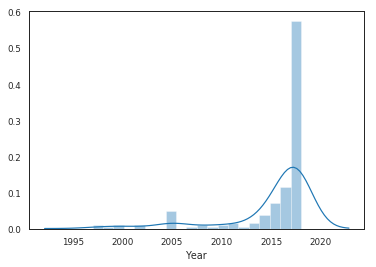

In [65]:
sns.distplot(df['Year'].dropna(axis=0))

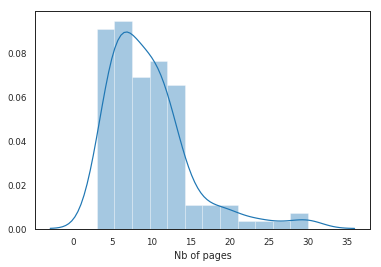

In [63]:
sns.distplot(df['Nb of pages'].dropna(axis=0))

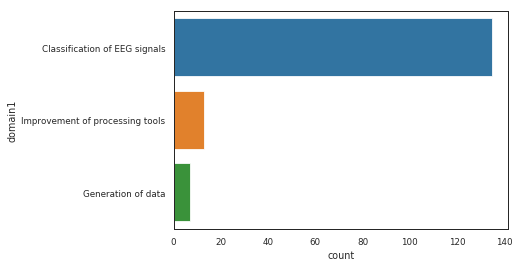

In [59]:
sns.countplot(y='domain1', data=df)

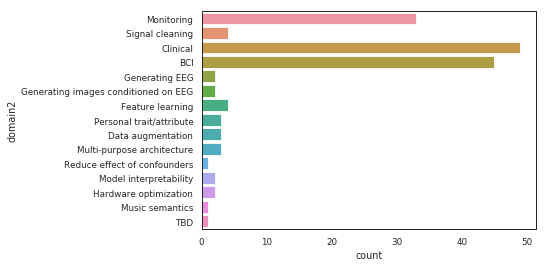

In [52]:
sns.countplot(y='domain2', data=df)

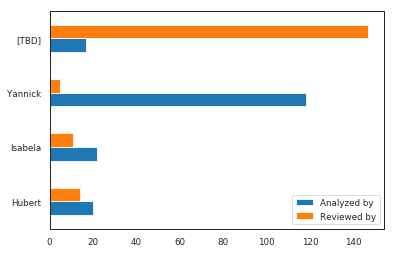

In [38]:
df[['Analyzed by', 'Reviewed by']].apply(pd.value_counts).plot(kind='barh')

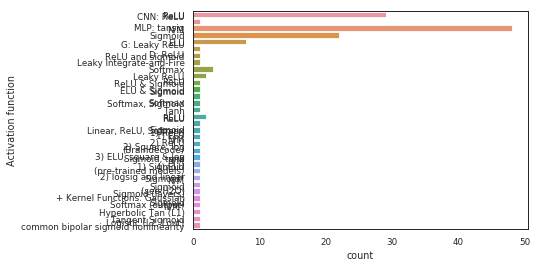

In [43]:
sns.countplot(y='Activation function', data=df)

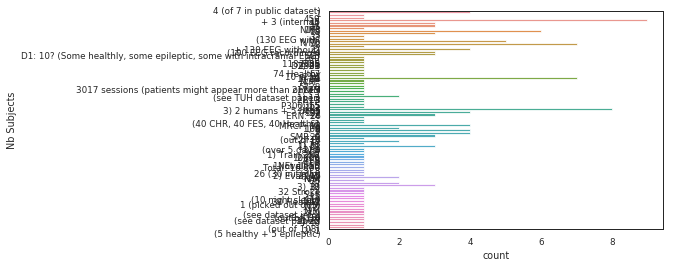

In [66]:
sns.countplot(y='Nb Subjects', data=df)

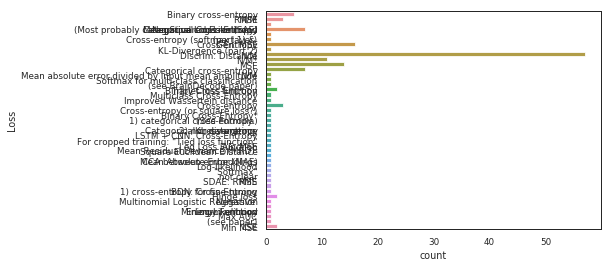

In [67]:
sns.countplot(y='Loss', data=df)